## Análise Exploratória da Base de Dados Covid 19 em Curitiba

Análise realizada pelos alunos da disciplina Ciência de Dados e suas aplicações em cenário de pandemia.

Objetivo: <b>Analisar número de casos e óbitos de Covid 19 na cidade de Curitiba.</b>

### Etapa 1 - Leitura do arquivo csv

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt

df = pd.read_csv(r'https://mid.curitiba.pr.gov.br/dadosabertos/CasosCovid19/2020-10-25_Casos_Covid_19_-_Base_de_Dados.csv', sep=';', encoding='cp1252', header=0, index_col=0)
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,EVOLUÇÃO,DATA DO ÓBITO
POSIÇÃO,,,,,,
1.0,11/03/2020,CONFIRMADO,54.0,M,RECUPERADO,NaN
2.0,12/03/2020,CONFIRMADO,43.0,M,RECUPERADO,NaN
3.0,12/03/2020,CONFIRMADO,15.0,M,RECUPERADO,NaN
4.0,12/03/2020,CONFIRMADO,25.0,F,RECUPERADO,NaN
5.0,12/03/2020,CONFIRMADO,58.0,M,RECUPERADO,NaN


Para facilitar a análise, podemos renomear as colunas.

In [2]:
renomear_colunas = ['DATA_NOTIFICACAO','CLASSIFICAÇÃO','IDADE','SEXO','STATUS','DATA_OBITO']
df.columns = renomear_colunas
df

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO
POSIÇÃO,,,,,,
1.000,11/03/2020,CONFIRMADO,54.0,M,RECUPERADO,NaN
2.000,12/03/2020,CONFIRMADO,43.0,M,RECUPERADO,NaN
3.000,12/03/2020,CONFIRMADO,15.0,M,RECUPERADO,NaN
4.000,12/03/2020,CONFIRMADO,25.0,F,RECUPERADO,NaN
5.000,12/03/2020,CONFIRMADO,58.0,M,RECUPERADO,NaN
...,...,...,...,...,...,...
50.379,23/10/2020,CONFIRMADO,17.0,F,NaN,NaN
50.380,23/10/2020,CONFIRMADO,26.0,M,NaN,NaN
50.381,23/10/2020,CONFIRMADO,19.0,M,NaN,NaN


Vamos também alterar os tipos das colunas adequadamente.

In [3]:
# converte colunas para formato data
df[['DATA_NOTIFICACAO','DATA_OBITO']] = df[['DATA_NOTIFICACAO','DATA_OBITO']].apply(pd.to_datetime, dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 50383 entries, 1.0 to 50.383
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA_NOTIFICACAO  50383 non-null  datetime64[ns]
 1   CLASSIFICAÇÃO     50383 non-null  object        
 2   IDADE             50372 non-null  float64       
 3   SEXO              50383 non-null  object        
 4   STATUS            47251 non-null  object        
 5   DATA_OBITO        1437 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 2.7+ MB


### Etapa 2 - Verificação colunas e valores

Podemos verificar inicialmente quais os valores distintos em algumas colunas, para verificar a classificação. A seguir, verificamos como os dados são classificados na coluna Status.

In [4]:
df['STATUS'].unique()

array(['RECUPERADO', 'ÓBITO CONF', nan], dtype=object)

Verificamos que o Status é classificado em <b>Recuperado</b> e <b>Óbito Confirmado</b>. Também temos alguns valores nulos, onde possivelmente os casos ainda estão sendo avaliados. Primeiramente, vamos analisar os óbitos confirmados no município.

In [5]:
df_obitos= df[df['STATUS']=='ÓBITO CONF']
df_obitos

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO
POSIÇÃO,,,,,,
111.000,2020-03-28,CONFIRMADO,61.0,M,ÓBITO CONF,2020-04-18
119.000,2020-03-29,CONFIRMADO,56.0,F,ÓBITO CONF,2020-04-06
138.000,2020-03-31,CONFIRMADO,93.0,M,ÓBITO CONF,2020-04-21
150.000,2020-03-31,CONFIRMADO,39.0,F,ÓBITO CONF,2020-04-25
156.000,2020-04-01,CONFIRMADO,85.0,M,ÓBITO CONF,2020-04-20
...,...,...,...,...,...,...
47.931,2020-10-15,CONFIRMADO,89.0,M,ÓBITO CONF,2020-10-22
48.043,2020-10-15,CONFIRMADO,75.0,M,ÓBITO CONF,2020-08-20
48.190,2020-10-15,CONFIRMADO,87.0,M,ÓBITO CONF,2020-10-16


Agora podemos verificar a quantidade de óbitos por mês. Para isso, extraimos da coluna data_obito apenas os valores referentes ao ano e mês, e contabilizamos quantas ocorrências aconteceram para cada mês.

In [6]:
df_obitos['DATA_OBITO_MES_ANO'] = df_obitos['DATA_OBITO'].dt.to_period('M')
df_obitos

<ipython-input-6-3aa56e8086e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obitos['DATA_OBITO_MES_ANO'] = df_obitos['DATA_OBITO'].dt.to_period('M')


,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO,DATA_OBITO_MES_ANO
POSIÇÃO,,,,,,,
111.000,2020-03-28,CONFIRMADO,61.0,M,ÓBITO CONF,2020-04-18,2020-04
119.000,2020-03-29,CONFIRMADO,56.0,F,ÓBITO CONF,2020-04-06,2020-04
138.000,2020-03-31,CONFIRMADO,93.0,M,ÓBITO CONF,2020-04-21,2020-04
150.000,2020-03-31,CONFIRMADO,39.0,F,ÓBITO CONF,2020-04-25,2020-04
156.000,2020-04-01,CONFIRMADO,85.0,M,ÓBITO CONF,2020-04-20,2020-04
...,...,...,...,...,...,...,...
47.931,2020-10-15,CONFIRMADO,89.0,M,ÓBITO CONF,2020-10-22,2020-10
48.043,2020-10-15,CONFIRMADO,75.0,M,ÓBITO CONF,2020-08-20,2020-08
48.190,2020-10-15,CONFIRMADO,87.0,M,ÓBITO CONF,2020-10-16,2020-10


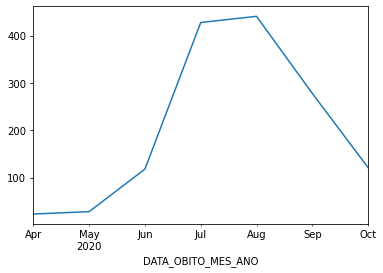

In [7]:
df_obitos_series= df_obitos.groupby(['DATA_OBITO_MES_ANO']).size().rename('Numero de Obitos')
df_obitos_series.plot()

Plotando o gráfico do número de mortes ao longo do tempo, verificamos possíveis erros no dataset, com datas de óbitos antes mesmo da pandemia iniciar (em Jan/2020) e também com datas futuras (Dez/2020). Podemos verificar quais os valores mínimos e máximos na coluna DATA_OBITO.

In [8]:
print("Data do primeiro óbito:" ,df_obitos['DATA_OBITO'].min())
print("Data máxima de óbitos:",df_obitos['DATA_OBITO'].max())

Data do primeiro óbito: 2020-04-06 00:00:00
Data máxima de óbitos: 2020-10-22 00:00:00


Algumas datas podem estar com valores do mês e dia invertidos, mas precisamos analisar o dataset com mais detalhes para verificar essa possibilidade. Podemos também buscar erros e inconsistências nos dados referentes à idade do paciente. Para visualizar a amostra, podemos utilizar o box plot na coluna "IDADE".

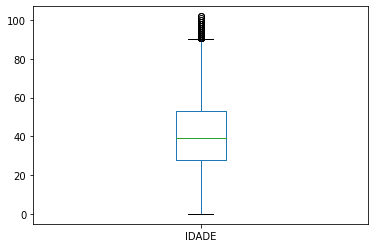

In [9]:
df['IDADE'].plot.box()

Para verificar outras estatísticas interessantes sobre essa coluna, podemos utilizar o método describe.

In [10]:
df['IDADE'].describe()

count    50372.000000
mean        40.947173
std         17.790648
min          0.000000
25%         28.000000
50%         39.000000
75%         53.000000
max        102.000000
Name: IDADE, dtype: float64

Aparentemente, essa coluna possui valores dentro do esperado, com a idade dos pacientes entre 0 e 102 anos e a média de idade de 41 anos.

### Próximos passos
Nessa primeira análise, verificamos que esse dataset possui erros referentes à data de óbitos registrados na cidade de Curitiba. Nas próximas semanas, iremos utilizar outros métodos e documentar como iremos tratar esses valores errôneos. Também iremos aprofundar a análise em outras colunas importantes disponíveis na base.

In [11]:
#exemplo de filtro entre datas
df_obitos_filtrado = df_obitos[(df_obitos['DATA_OBITO']>='2020-04-01') & (df_obitos['DATA_OBITO']<='2020-05-01')]
df_obitos_filtrado

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO,DATA_OBITO_MES_ANO
POSIÇÃO,,,,,,,
111.0,2020-03-28,CONFIRMADO,61.0,M,ÓBITO CONF,2020-04-18,2020-04
119.0,2020-03-29,CONFIRMADO,56.0,F,ÓBITO CONF,2020-04-06,2020-04
138.0,2020-03-31,CONFIRMADO,93.0,M,ÓBITO CONF,2020-04-21,2020-04
150.0,2020-03-31,CONFIRMADO,39.0,F,ÓBITO CONF,2020-04-25,2020-04
156.0,2020-04-01,CONFIRMADO,85.0,M,ÓBITO CONF,2020-04-20,2020-04
173.0,2020-04-01,CONFIRMADO,94.0,M,ÓBITO CONF,2020-04-06,2020-04
184.0,2020-04-02,CONFIRMADO,56.0,M,ÓBITO CONF,2020-04-07,2020-04
187.0,2020-04-02,CONFIRMADO,81.0,M,ÓBITO CONF,2020-04-27,2020-04
205.0,2020-04-03,CONFIRMADO,82.0,M,ÓBITO CONF,2020-04-14,2020-04


### RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE
verificando a relação de obitos por idade, percebe-se que a partir de 50 até 80 anos tem um concentração maior de mortos.

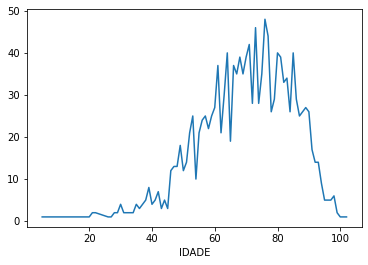

In [12]:
df_morte=df_obitos.groupby(['IDADE']).size()
df_morte.plot()

### RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE SEXO MASCULINO E FEMININO

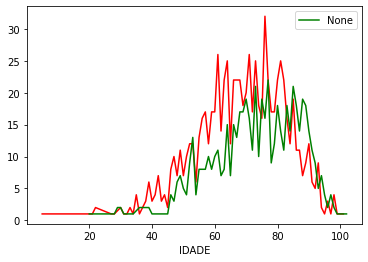

In [13]:
#separando os obitos dos homens
df_m=df_obitos[df_obitos['SEXO']=='M']
df_m=df_m.groupby(['IDADE']).size()

#separando os obitos das mulheres
df_f=df_obitos[df_obitos['SEXO']=='F']
df_f=df_f.groupby(['IDADE']).size()

df_m.plot(color='r')
df_f.plot(color='g',legend=True)

os dados sugerem que homens tendem a morrer mais que as mulheres

### RELAÇÃO TOTA DE CONTAMINADOS POR IDADE

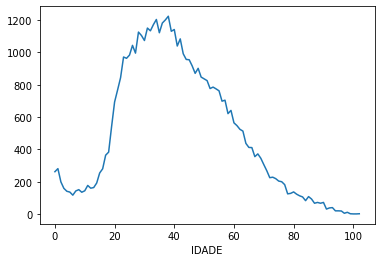

In [14]:
#relação total de contaminados por idade
df_com = df.groupby(['IDADE']).size()
df_com.plot()

o grafico sugere que a partir de 20 anos ate 60 anos tem uma alta concentração de pessoas infectadas

### RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE MASCULINO E FEMININO

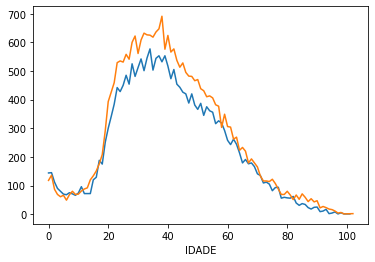

In [15]:
# RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE masculino
#separando os obitos dos homens
df_mtot=df[df['SEXO']=='M']
df_mtot=df_mtot.groupby(['IDADE']).size()

#separando os obitos das mulheres
df_ftot=df[df['SEXO']=='F']
df_ftot=df_ftot.groupby(['IDADE']).size()

df_mtot.plot()
df_ftot.plot()

o grafico sugere quem as mulheres tem uma leve tendencia de se infectarem mais